In [1]:
import csv
import math
import time
import warnings
import operator
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

import sys
sys.path.insert(0,'..')
import folium
from folium import plugins

from dateutil.parser import parse
from datetime import datetime
from scipy import stats
from IPython.display import display_html
from multiprocessing import Pool

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

/opt/conda/anaconda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_ads = pd.read_csv('gs://aes-datahub-0002-curated/Outage_Restoration/Historical_Data/Master_Dataset/OMS_IPL_OUTAGE_DATASET_V9.3.csv',index_col=0)
df_ads = df_ads.loc[:, ~df_ads.columns.str.contains('^Unnamed')]
df_ads.reset_index(drop=True, inplace=True)
print(df_ads.shape)

(19673, 156)


In [3]:
def count_outage(group):
    group = group.reset_index(drop = True)
    group['LIVE_OUTAGE'] = len(df_live_out[(df_live_out.CREATION_DATETIME < group.CREATION_DATETIME[0]) & (df_live_out.ENERGIZED_DATETIME > group.CREATION_DATETIME[0])])
    return group

df_live_out = df_ads[['OUTAGE_ID','CREATION_DATETIME','ENERGIZED_DATETIME']]
df_live_out = df_live_out.groupby(['OUTAGE_ID'], as_index = False).apply(count_outage)

In [4]:
df_ads = pd.merge(df_ads, df_live_out[['OUTAGE_ID','LIVE_OUTAGE']], on = ['OUTAGE_ID'], how = "left")

In [5]:
select_case1 = df_ads[df_ads.LIVE_OUTAGE_y > 50]
select_case1.reset_index(drop=True,inplace=True)
display(select_case1.head())
print("\n")

select_case2 = df_ads[(df_ads.LIVE_OUTAGE_y > 200) & (df_ads.LIVE_OUTAGE_y < 300) & (df_ads.CREATION_DATETIME < '2016-05-30 23:17:15')]
select_case2.reset_index(drop=True,inplace=True)
display(select_case2.tail())
print("\n")

select_case3 = df_ads[(df_ads.LIVE_OUTAGE_y > 400) & (df_ads.LIVE_OUTAGE_y < 500)]
select_case3.reset_index(drop=True,inplace=True)
display(select_case3.head())
print("\n")

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE_x,ACTIVE_NO_OF_TRUCKS,Min_Distance,Marker_Location,Hour_Sin,Hour_Cos,MAJ_OTG_ID,LAST_CREATION_DATETIME,FIRST_CREATION_DATETIME,RANK_SUBSEQUENT_MAJ_OTG_ID,SEASON,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,presTendRange,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,clusters,LIVE_OUTAGE_y
0,2001393526,2000455375.00,369-A/159,STORM,2008-01-29 21:28:01,2008-01-30 10:50:00,2457.00,FUSE,245.00,46,44.00,0.00,NaN,44.00,175.00,175.00,False,801.98,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,INDIANAPOLIS,BROKEN WIRE,PRIMARY WIRE DOWN,NaN,TREE,ON PRIMARY,39.84,-86.12,ZONE3,94,nan,2.32,Marker8,-0.71,0.71,20080001002.00,2008-01-30 20:48:00,2008-01-29 19:19:21,48.00,WINTER,2008-01-29,100.00,100.00,97.00,39.00,50.40,8.30,37.70,48.30,-1.60,43.70,52.50,14.00,39.84,-86.10,998.00,1005.00,988.70,0.40,-0.10,3.70,-1.90,13.20,55.40,0.00,317.00,84.70,99.80,53.60,970.00,975.70,960.30,0.00,0.00,5.60,8.10,1.40,43.70,52.50,14.00,41.60,51.30,12.70,37.70,48.30,-1.60,216.00,216.00,210.00,27.20,37.20,19.90,27.60,37.50,20.30,11.40,21.30,7.10,5.60,38.50,14.20,15.40,3.00,46.20,1.86,1.02,Cluster4,51
1,2001393530,2000455377.00,M01-Z/16,STORM,2008-01-29 21:31:14,2008-01-30 00:45:00,7052.00,FUSE,705.00,1,1.00,0.00,NaN,1.00,15.00,15.00,False,193.77,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,MOORESVILLE,BROKEN WIRE,OTHER,NaN,O.H. EQUIPMENT,JUMPER BURNED OPEN,39.60,-86.42,ZONE1,95,nan,1.16,Marker18,-0.71,0.71,20080001002.00,2008-01-30 20:48:00,2008-01-29 19:19:21,49.00,WINTER,2008-01-29,100.00,100.00,98.00,38.30,49.90,6.80,34.60,49.60,-10.90,42.80,54.10,10.50,39.59

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE_x,ACTIVE_NO_OF_TRUCKS,Min_Distance,Marker_Location,Hour_Sin,Hour_Cos,MAJ_OTG_ID,LAST_CREATION_DATETIME,FIRST_CREATION_DATETIME,RANK_SUBSEQUENT_MAJ_OTG_ID,SEASON,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,presTendRange,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,clusters,LIVE_OUTAGE_y
855,2002216308,2001124182.00,432-B/121,STORM,2016-04-03 08:48:00,2016-04-03 18:00:00,3209.00,FUSE,320.00,10,56.00,0.00,2016-04-03 18:30:00,56.00,200.00,0.00,True,552.00,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,INDIANAPOLIS,TRANSFORMER,SECONDARY BUSHING,NaN,TREE,TREE ON PRI (OUTSIDE TRIM ZONE),39.81,-86.19,ZONE4,219,68.00,3.89,Marker7,0.87,-0.50,20160007002.00,2016-04-05 02:07:09,2016-04-02 13:04:22,236.00,SPRING,2016-04-03,2.00,22.00,0.00,27.70,39.80,19.10,42.90,62.00,23.20,45.90,62.00,26.30,39.84,-86.21,1014.70,1019.50,1009.00,0.00,-0.30,0.90,-2.10,280.00,889.00,0.00,6720.00,51.80,84.30,34.00,986.40,991.50,980.50,0.00,0.00,3.40,5.30,2.30,45.90,62.00,26.30,38.90,50.30,24.90,42.90,62.00,23.20,222.00,222.00,216.00,18.70,32.80,4.70,18.80,32.40,4.70,9.40,17.90,1.80,3.00,35.70,16.10,11.00,22.00,50.30,2.48,1.01,Cluster2,202
856,2002216106,2001124188.00,515-A/165,STORM,2016-04-03 08:57:28,2016-04-03 09:02:40,3453.00,1TBOH,345.00,1,3.00,0.00,NaN,3.00,50.00,50.00,True,5.20,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,INDIANAPOLIS,OPENED FOR SAFETY,FOR TREE CREW,NaN,NaN,NaN,39.78,-86.07,ZONE3,218,68.00,3.02,Marker12,0.87,-0.50,20160007002.00,2016-04-05 02:07:09,2016-04-02 13:04:22,237.00,SPRING,2016-04-03,2.00,26.00,0.00,27.00,39.00,19.90,43.00,62.0

,OUTAGE_ID,INCIDENT_ID,STRCTUR_NO,EVENT,CREATION_DATETIME,ENERGIZED_DATETIME,CIRCT_ID,DNI_EQUIP_TYPE,SUBST_ID,CALL_QTY,DOWNSTREAM_CUST_QTY,KEY_CUST_QTY,ETR_DATETIME,CUST_QTY,DOWNSTREAM_KVA_VAL,KVA_VAL,DAY_FLAG,TTR,POLE_CLUE_FLG,PART_LIGHT_CLUE_FLG,EMERGENCY_CLUE_FLG,POWER_OUT_CLUE_FLG,OPEN_DEVICE_CLUE_FLG,TREE_CLUE_FLG,WIRE_DOWN_CLUE_FLG,IVR_CLUE_FLG,EQUIPMENT_CLUE_FLG,TRANSFORMER_CLUE_FLG,OH_CAUSE_FLG,UG_CAUSE_FLG,ANIMAL_CAUSE_FLG,WEATHER_CAUSE_FLG,WEATHER_COLD_CAUSE_FLG,PUBLIC_CAUSE_FLG,WEATHER_LIGHTNING_CAUSE_FLG,WEATHER__SNOW_CAUSE_FLG,WEATHER__WIND_CAUSE_FLG,WEATHER__HEAT_CAUSE_FLG,CUST_REQUEST_CAUSE_FLG,WEATHER__FLOOD_CAUSE_FLG,STREET_CAUSE_FLG,SUBSTATION_CAUSE_FLG,TREE_CAUSE_FLG,MISCELLANEOUS_CAUSE_FLG,NO_CAUSE_FLG,PLANNED_CAUSE_FLG,NO_OUTAGE_CAUSE_FLG,FUSE_OCCURN_FLG,CUST_EQUIP_OCCURN_FLG,POLE_OCCURN_FLG,TRANSFORMER_OCCURN_FLG,METER_OCCURN_FLG,SERVICE_OCCURN_FLG,CABLE_OCCURN_FLG,ST_OCCURN_FLG,FIRE_OCCURN_FLG,FOUND_OPEN_OCCURN_FLG,PUBLIC_SAFETY_OCCURN_FLG,WIRE_OCCURN_FLG,SWITCH_OCCURN_FLG,REGULATOR_OCCURN_FLG,CUTOUT_OCCURN_FLG,CAP_BANK_OCCURN_FLG,RECLOSER_OCCURN_FLG,OH_OCCURN_FLG,PRIORITY_VAL_1.0,PRIORITY_VAL_2.0,PRIORITY_VAL_3.0,PRIORITY_VAL_5.0,CITY_NAM,PRIM_OCCURN_DESC,SECO_OCCURN_DESC,TERT_OCCURN_DESC,PRIM_CAUSE_DESC,SECO_CAUSE_DESC,LAT,LONG,ZONE,LIVE_OUTAGE_x,ACTIVE_NO_OF_TRUCKS,Min_Distance,Marker_Location,Hour_Sin,Hour_Cos,MAJ_OTG_ID,LAST_CREATION_DATETIME,FIRST_CREATION_DATETIME,RANK_SUBSEQUENT_MAJ_OTG_ID,SEASON,Date,cldCvrAvg,cldCvrMax,cldCvrMin,dewPtAvg,dewPtMax,dewPtMin,feelsLikeAvg,feelsLikeMax,feelsLikeMin,heatIndexAvg,heatIndexMax,heatIndexMin,latitude,longitude,mslPresAvg,mslPresMax,mslPresMin,precip,presTendAvg,presTendMax,presTendMin,radSolarAvg,radSolarMax,radSolarMin,radSolarTot,relHumAvg,relHumMax,relHumMin,sfcPresAvg,sfcPresMax,sfcPresMin,snowDepth,snowfall,spcHumAvg,spcHumMax,spcHumMin,tempAvg,tempMax,tempMin,wetBulbAvg,wetBulbMax,wetBulbMin,windChillAvg,windChillMax,windChillMin,windDir100mAvg,windDir80mAvg,windDirAvg,windSpd100mAvg,windSpd100mMax,windSpd100mMin,windSpd80mAvg,windSpd80mMax,windSpd80mMin,windSpdAvg,windSpdMax,windSpdMin,presTendRange,tempRange,windSpdRange,sfcPresRange,cldCvrRange,relHumRange,relHumRatio,sfcPresRatio,clusters,LIVE_OUTAGE_y
0,2001425183,2000480632.00,231-A/36,STORM,2008-05-31 08:16:51,2008-06-01 12:30:00,2857.00,1TBOH,285.00,5,4.00,0.00,NaN,4.00,25.00,25.00,True,1693.15,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,INDIANAPOLIS,FUSE,FUSE BLOWN,NaN,TREE,ON PRIMARY,39.90,-86.21,ZONE4,664,nan,0.64,Marker3,0.87,-0.50,20080006003.00,2008-06-05 15:54:11,2008-05-30 21:27:08,361.00,SPRING,2008-05-31,50.00,100.00,1.00,62.20,69.10,56.20,74.10,81.40,66.50,74.10,81.40,66.50,39.91,-86.20,1009.80,1011.90,1007.40,0.00,0.20,0.80,-0.40,332.70,972.20,0.00,7985.40,70.00,100.00,44.00,980.20,981.90,977.60,0.00,0.00,12.50,15.60,10.00,73.60,80.90,66.50,66.40,69.40,61.60,73.60,80.90,66.50,263.00,263.00,262.00,15.50,24.70,8.20,15.60,24.70,8.50,9.10,18.00,2.20,1.20,14.40,15.80,4.30,99.00,56.00,2.27,1.00,Cluster3,401
1,2001425191,2000480638.00,442-B/77,STORM,2008-05-31 08:18:43,2008-06-02 20:59:50,5454.00,1TBOH,28.00,3,4.00,0.00,NaN,4.00,25.00,25.00,True,3641.12,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,INDIANAPOLIS,FUSE,FUSE BLOWN,NaN,WEATHER,LIGHTNING,39.81,-86.10,ZONE3,665,nan,3.62,Marker8,0.87,-0.50,20080006003.00,2008-06-05 15:54:11,2008-05-30 21:27:08,362.00,SPRING,2008-05-31,54.00,100.00,0.00,62.80,69.80,57.30,74.60,81.70,66.60,74.60,81.70,66.60,39.84,-86.10,1010.00,1012.00,1007.80,

In [6]:
case1 = (df_ads[(df_ads.CREATION_DATETIME < "2019-06-23 17:08:20") & (df_ads.ENERGIZED_DATETIME > "2019-06-23 17:08:20")])
case2 = (df_ads[(df_ads.CREATION_DATETIME < "2014-01-07 12:37:00") & (df_ads.ENERGIZED_DATETIME > "2014-01-07 12:37:00")])
case3 = (df_ads[(df_ads.CREATION_DATETIME < "2008-05-31 08:16:51") & (df_ads.ENERGIZED_DATETIME > "2008-05-31 08:16:51")])

In [7]:
print(case1.shape)
print(case2.shape)
print(case3.shape)

(56, 157)
(270, 157)
(401, 157)


#### CASE 1 
- Index 19629
- Outage ID - 2002571985
- Creation Datetime - 2019-06-23 17:08:20
- Outages - 56

In [10]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

for i in range(0,len(case1)):
    folium.Marker([case1.iloc[i]['LAT'], case1.iloc[i]['LONG']],popup=case1.iloc[i]['DOWNSTREAM_CUST_QTY'],icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

folium.Marker([cent_lat_case1,cent_long_case1],popup="Centriod",icon=folium.Icon(color='orange', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
    
ipl_map

#### CASE 2 
* Index 10101
* Outage ID - 2001995358
* CREATION_DATETIME - 2014-01-07 12:37:00
* Outages - 270

In [11]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

for i in range(0,len(case2)):
    folium.Marker([case2.iloc[i]['LAT'], case2.iloc[i]['LONG']],popup=case2.iloc[i]['DOWNSTREAM_CUST_QTY'],icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

folium.Marker([cent_lat_case2,cent_long_case2],popup="Centriod",icon=folium.Icon(color='orange', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
ipl_map

#### CASE 3
- Index 1142
- Outage ID - 2001425183
- Creation Datetime - 2008-05-31 08:16:51
- Outages - 401

In [12]:
ipl_map = folium.Map(location=[39.79,-86.14],zoom_start = 11)

for i in range(0,len(case3)):
    folium.Marker([case3.iloc[i]['LAT'], case3.iloc[i]['LONG']],popup=case3.iloc[i]['DOWNSTREAM_CUST_QTY'],icon=folium.Icon(color='black', icon_color='white', icon='flag', angle=0, prefix='fa')).add_to(ipl_map)

folium.Marker([cent_lat_case3,cent_long_case3],popup="Centriod",icon=folium.Icon(color='orange', icon_color='white', icon='male', angle=0, prefix='fa')).add_to(ipl_map)
ipl_map

### **APPROACH 1**

-Calculate distance from centroid for all outages present in the queue <br>
-Multiply distance from centriod and customer quantity to create refernce column <br>
-Rank based on reference column created and sort based on descending order <br>

In [9]:
case1.dropna(subset=['LAT','LONG'],inplace=True)

cent_lat_case1 = sum(case1.LAT)/len(case1.LAT)
cent_long_case1 = sum(case1.LONG)/len(case1.LONG)

cent_lat_case2 = sum(case2.LAT)/len(case2.LAT)
cent_long_case2 = sum(case2.LONG)/len(case2.LONG)

cent_lat_case3 = sum(case3.LAT)/len(case3.LAT)
cent_long_case3 = sum(case3.LONG)/len(case3.LONG)

print(cent_lat_case1,cent_long_case1)
print(cent_lat_case2,cent_long_case2)
print(cent_lat_case3,cent_long_case3)

39.763182289345984 -86.10256446382684
39.79709127473431 -86.12458909366464
39.828445449129 -86.11132286831328


In [25]:
import geopy.distance

def cal_distance_case1(lat, long):
    coords1 = [lat,long]
    coords2 = [cent_lat_case1, cent_long_case1]
    return (geopy.distance.distance(coords1, coords2).miles)

case1['distance_from_centroid'] = case1.apply(lambda x: cal_distance_case1(x.LAT, x.LONG), axis=1)

In [26]:
def cal_distance_case2(lat, long):
    coords1 = [lat,long]
    coords2 = [cent_lat_case2, cent_long_case2]
    return (geopy.distance.distance(coords1, coords2).miles)

case2['distance_from_centroid'] = case2.apply(lambda x: cal_distance_case2(x.LAT, x.LONG), axis=1)

In [27]:
def cal_distance_case3(lat, long):
    coords1 = [lat,long]
    coords2 = [cent_lat_case3, cent_long_case3]
    return (geopy.distance.distance(coords1, coords2).miles)

case3['distance_from_centroid'] = case3.apply(lambda x: cal_distance_case3(x.LAT, x.LONG), axis=1)

In [37]:
case1['distance_from_centroid/Cust_qty'] = case1['distance_from_centroid'] / case1['DOWNSTREAM_CUST_QTY']
case1['Rank'] = case1['distance_from_centroid/Cust_qty'].rank(method='max')

In [39]:
case2['distance_from_centroid/Cust_qty'] = case2['distance_from_centroid'] / case2['DOWNSTREAM_CUST_QTY']
case2['Rank'] = case2['distance_from_centroid/Cust_qty'].rank(method='max')

In [40]:
case3['distance_from_centroid/Cust_qty'] = case3['distance_from_centroid'] / case3['DOWNSTREAM_CUST_QTY']
case3['Rank'] = case3['distance_from_centroid/Cust_qty'].rank(method='max')

In [41]:
case1.sort_values(by='Rank',inplace=True)
case1.reset_index(drop=True,inplace=True)
case1[['OUTAGE_ID','LAT','LONG','distance_from_centroid','DOWNSTREAM_CUST_QTY','distance_from_centroid/Cust_qty','Rank']].head(10)

,OUTAGE_ID,LAT,LONG,distance_from_centroid,DOWNSTREAM_CUST_QTY,distance_from_centroid/Cust_qty,Rank
0,2002571462,39.73,-86.05,3.72,1368.00,0.00,1.00
1,2002571486,39.67,-86.19,7.99,1356.00,0.01,2.00
2,2002571756,39.84,-86.10,5.31,773.00,0.01,3.00
3,2002571887,39.80,-86.01,5.48,763.00,0.01,4.00
4,2002571866,39.81,-86.32,12.11,1121.00,0.01,5.00
5,2002572082,39.76,-86.06,2.08,104.00,0.02,6.00
6,2002571747,39.78,-86.03,4.32,106.00,0.04,7.00
7,2002571791,39.72,-86.10,2.76,66.00,0.04,8.00
8,2002572188,39.87,-86.05,7.87,149.00,0.05,9.00
9,2002571719,39.81,-86.01,5.85,106.00,0.06,10.00


In [42]:
case2.sort_values(by='Rank',inplace=True)
case2.reset_index(drop=True,inplace=True)
case2[['OUTAGE_ID','LAT','LONG','distance_from_centroid','DOWNSTREAM_CUST_QTY','distance_from_centroid/Cust_qty','Rank']].head(10)

,OUTAGE_ID,LAT,LONG,distance_from_centroid,DOWNSTREAM_CUST_QTY,distance_from_centroid/Cust_qty,Rank
0,2001991473,39.78,-86.14,1.50,122.00,0.01,1.00
1,2001994151,39.75,-86.12,3.06,240.00,0.01,2.00
2,2001992188,39.79,-86.12,0.63,31.00,0.02,3.00
3,2001992302,39.83,-86.08,3.23,77.00,0.04,4.00
4,2001984928,39.80,-86.13,0.61,14.00,0.04,5.00
5,2001983797,39.84,-86.11,2.78,63.00,0.04,6.00
6,2001983697,39.75,-86.10,3.37,72.00,0.05,7.00
7,2001985405,39.80,-86.11,0.89,18.00,0.05,8.00
8,2001984290,39.80,-86.14,0.93,18.00,0.05,9.00
9,2001994106,39.83,-86.08,3.39,62.00,0.05,10.00


In [44]:
case3.sort_values(by='Rank',inplace=True)
case3.reset_index(drop=True,inplace=True)
case3[['OUTAGE_ID','LAT','LONG','distance_from_centroid','DOWNSTREAM_CUST_QTY','distance_from_centroid/Cust_qty','Rank']].head(10)

,OUTAGE_ID,LAT,LONG,distance_from_centroid,DOWNSTREAM_CUST_QTY,distance_from_centroid/Cust_qty,Rank
0,2001451220,39.86,-86.13,2.65,1578.00,0.00,1.00
1,2001451226,39.85,-86.14,2.00,992.00,0.00,2.00
2,2001427511,39.84,-86.05,3.31,1215.00,0.00,3.00
3,2001429408,39.82,-86.11,0.45,146.00,0.00,4.00
4,2001427688,39.83,-86.10,0.72,142.00,0.01,5.00
5,2001426115,39.87,-86.12,2.81,509.00,0.01,6.00
6,2001424338,39.75,-86.21,7.39,1266.00,0.01,7.00
7,2001464497,39.89,-85.96,9.29,1490.00,0.01,8.00
8,2001424414,39.87,-85.97,7.95,1263.00,0.01,9.00
9,2001422066,39.84,-86.14,1.81,276.00,0.01,10.00


,TTR,Rank
TTR,1.00,0.46
Rank,0.46,1.00


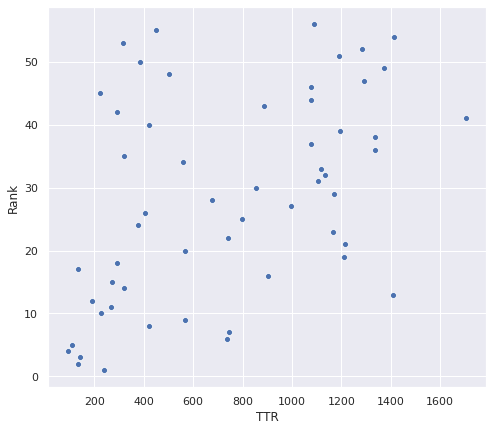

In [45]:
sns.set()
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.scatterplot(x="TTR", y="Rank", data=case1)
case1[['TTR','Rank']].corr()